In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (20,7)

In [33]:
def clean_trade_dataset(df):
    """
    Takes the df as provided by the imf and returns it as a clean and usable dataframe
    """
    df_transposed = df.iloc[5:,1:].T
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.iloc[1:, :]
    df_transposed.rename(columns={np.nan: "Year"}, inplace=True)
    df_transposed["Year"] = df_transposed["Year"].astype("int")
    df_transposed = df_transposed.set_index("Year")
    return df_transposed

def get_trade_activity(country_i, country_j):
    """
    Takes 2 countries as input
    Returns a dataframe with trade activity between these two countries
    X_i_j: export from country i to j
    X_i: total global export from country i
    M_i_j: import from country i to j
    M_i: total global import from country i
    Y_i: GDP of country i
    """
    X_i_j = dict_export[country_i][[country_j]].rename(columns={country_j: f"Export to {country_j}"})
    X_i = dict_export[country_i][["World"]].rename(columns={"World": f"Global Export {country_i}"})
    X_j = dict_export[country_j][["World"]].rename(columns={"World": f"Global Export {country_j}"})
    M_i_j = dict_import[country_i][[country_j]].rename(columns={country_j: f"Import from {country_j}"})
    M_i = dict_import[country_i][["World"]].rename(columns={"World": f"Global Import {country_i}"})
    M_j = dict_import[country_j][["World"]].rename(columns={"World": f"Global Import {country_j}"})
    Y_i = nominalGDP[[country_i]].rename(columns={country_i: f"GDP of {country_i}"})
    Y_j = nominalGDP[[country_j]].rename(columns={country_j: f"GDP of {country_j}"})
    W_i_j = pd.concat([X_i_j, X_i, M_i_j, M_i, X_j, M_j, Y_i, Y_j], axis=1)
    W_i_j["Trade Intensity"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"Global Export {country_i}"] + W_i_j[f"Global Import {country_i}"] + W_i_j[f"Global Export {country_j}"] + W_i_j[f"Global Import {country_j}"])
    W_i_j["Trade Intensity by bilateral trade"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"Global Export {country_i}"] + W_i_j[f"Global Import {country_i}"] + W_i_j[f"Global Export {country_j}"] + W_i_j[f"Global Import {country_j}"])
    W_i_j["Trade Intensity by GDP"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"GDP of {country_i}"] + W_i_j[f"GDP of {country_i}"])
    return W_i_j
    
    

## GDP of Countries

In [11]:
path_real_GDP = "data_StatApp/imf/NominalGDP.xls"
path_nominal_GDP = "data_StatApp/imf/NominalGDP.xls"
xls_realGDP = pd.ExcelFile(path_real_GDP)
xls_nominalGDP = pd.ExcelFile(path_nominal_GDP)
realGDP = pd.read_excel(xls_realGDP, 'Sheet1')
nominalGDP = pd.read_excel(xls_nominalGDP, 'Sheet1')

In [12]:
def process_GDP(df):
    df = df.set_index("Year")
    df = df.replace("...", np.nan)
    for column in df.columns:
        df = df.astype({column:'float'})
    return df

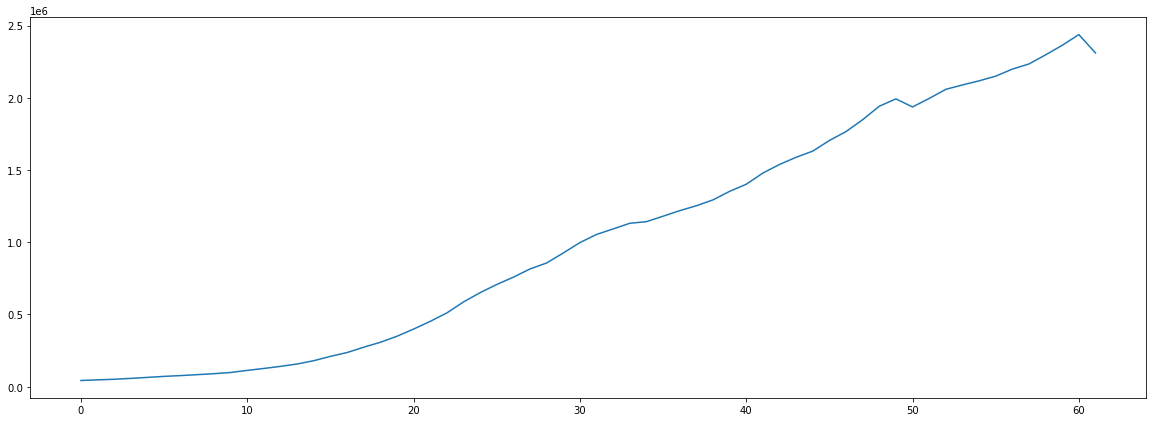

In [15]:
plt.plot(realGDP.France)

## Trade Activity

For each country, we get the export and import with other countries and store them into dictionnaries

In [49]:
list_countries = ["Australia", "France", "Germany", "Switzerland", "UnitedStates",
                  "Canada", "UnitedKingdom", "Denmark", "Italy"]
dict_paths = {}
dict_xls = {}
dict_export = {}
dict_import = {}

for country in list_countries:
    dict_paths[country] = f"data_StatApp/imf/trade/{country}.xls"
    dict_xls[country] = pd.ExcelFile(dict_paths[country])
    dict_export[country] = pd.read_excel(dict_xls[country], dict_xls[country].sheet_names[0])
    dict_export[country] = clean_trade_dataset(dict_export[country])
    dict_import[country] = pd.read_excel(dict_xls[country], dict_xls[country].sheet_names[1])
    dict_import[country] = clean_trade_dataset(dict_import[country])


WARNING *** file size (533543) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (510790) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (516104) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (503994) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (536840) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (528008) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (529451) not 512 + multiple of sector siz

In [50]:
dict_import["France"]

Unnamed: 1,Australia,World,Advanced Economies,Euro Area,Austria,Belgium,Belgium-Luxembourg,Cyprus,"Estonia, Rep. of",Finland,Germany,Greece,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,"Netherlands, The",Portugal,Slovak Rep.,"Slovenia, Rep. of",Spain,Australia,Canada,"China, P.R.: Hong Kong","China, P.R.: Macao",Czech Rep.,Denmark,Iceland,Israel,Japan,"Korea, Rep. of",New Zealand,Norway,"San Marino, Rep. of",Singapore,Sweden,Switzerland,Taiwan Province of China,United Kingdom,United States,Holy See,Emerging and Developing Economies,Emerging and Developing Asia,American Samoa,Bangladesh,Bhutan,Brunei Darussalam,Cambodia,"China, P.R.: Mainland","Fiji, Rep. of",French Polynesia,Guam,India,Indonesia,Kiribati,Lao People's Dem. Rep.,Malaysia,Maldives,"Marshall Islands, Rep. of the","Micronesia, Federated States of",Mongolia,Myanmar,"Nauru, Rep. of",Nepal,New Caledonia,"Palau, Rep. of",Papua New Guinea,Philippines,Samoa,Solomon Islands,Sri Lanka,Thailand,"Timor-Leste, Dem. Rep. of",Tonga,Tuvalu,Vanuatu,Vietnam,Asia not specified,Emerging and Developing Europe,Albania,"Belarus, Rep. of",Bosnia and Herzegovina,Bulgaria,"Croatia, Rep. of",Czechoslovakia,Faroe Islands,Gibraltar,Hungary,"Kosovo, Rep. of","Moldova, Rep. of",Montenegro,"North Macedonia, Republic of","Poland, Rep. of",Romania,Russian Federation,"Serbia, Rep. of",Serbia and Montenegro,Turkey,Yugoslavia,Ukraine,USSR,Europe not specified,Middle East and Central Asia,"Afghanistan, Islamic Rep. of",Algeria,"Armenia, Rep. of","Azerbaijan, Rep. of","Bahrain, Kingdom of",Djibouti,"Egypt, Arab Rep. of",Georgia,"Iran, Islamic Rep. of",Iraq,Jordan,"Kazakhstan, Rep. of",Kuwait,Kyrgyz Rep.,Lebanon,Libya,"Mauritania, Islamic Rep. of",Morocco,Oman,Pakistan,Qatar,Saudi Arabia,Somalia,Sudan,Syrian Arab Rep.,"Tajikistan, Rep. of",Tunisia,Turkmenistan,United Arab Emirates,"Uzbekistan, Rep. of",West Bank and Gaza,Yemen Arab Rep.,"Yemen, People's Dem. Rep. of","Yemen, Rep. of",Middle East and Central Asia not specified,Sub-Saharan Africa,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Rep.,Chad,"Comoros, Union of the","Congo, Dem. Rep. of the","Congo, Rep. of",Côte d'Ivoire,"Equatorial Guinea, Rep. of","Eritrea, The State of","Eswatini, Kingdom of","Ethiopia, The Federal Dem. Rep. of",Gabon,"Gambia, The",Ghana,Guinea,Guinea-Bissau,Kenya,"Lesotho, Kingdom of",Liberia,"Madagascar, Rep. of",Malawi,Mali,Mauritius,"Mozambique, Rep. of",Namibia,Niger,Nigeria,Rwanda,"São Tomé and Príncipe, Dem. Rep. of",Senegal,Seychelles,Sierra Leone,South Africa,"South Sudan, Rep. of","Tanzania, United Rep. of",Togo,Uganda,Zambia,Zimbabwe,Africa not specified,Western Hemisphere,Anguilla,Antigua and Barbuda,Argentina,"Aruba, Kingdom of the Netherlands","Bahamas, The",Barbados,Belize,Bermuda,Bolivia,Brazil,Chile,Colombia,Costa Rica,"Curaçao, Kingdom of the Netherlands",Dominica,Dominican Rep.,Ecuador,El Salvador,Falkland Islands (Malvinas),Greenland,Grenada,Guatemala,Guyana,Haiti,Honduras,Jamaica,Mexico,Montserrat,Netherlands Antilles,Nicaragua,Panama,Paraguay,Peru,"Sint Maarten, Kingdom of the Netherlands",St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Suriname,Trinidad and Tobago,Uruguay,"Venezuela, Rep. Bolivariana de",Western Hemisphere not specified,Other Countries not included elsewhere,Cuba,Eastern Germany,"Korea, Dem. People's Rep. of",Special Categories,Countries & Areas not specified,Memorandum Items,Africa,Middle East,European Union,Emerging Market and Developing Economies by Source of Export Earnings: Fuel,Emerging Market and Developing Economies by Source of Export Earnings: Nonfuel
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,140.8,6065.6,3612.9,2018.7,20.5,NaN,372.4,2.6,NaN,54.8,990.3,11.6,3.2,252.7,NaN,NaN,NaN,NaN,233.5,13.4,NaN,NaN,63.7,140.8,91.3,1.5,

In [58]:
W_France_Germany_function = get_trade_activity("France", "Germany")

In [59]:
W_France_Germany_function.head()

,Export to Germany,Global Export France,Import from Germany,Global Import France,Global Export Germany,Global Import Germany,GDP of France,GDP of Germany,Trade Intensity,Trade Intensity by bilateral trade,Trade Intensity by GDP
Year,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,42263.0,NaN,NaN,NaN,NaN
1960,943.2,6753.8,990.3,6065.6,11381.0,10013.0,46834.0,NaN,0.056513,0.056513,0.020642
1961,1095.6,7099.5,1139.9,6488.2,12648.0,10882.0,50775.0,NaN,0.060227,0.060227,0.022014
1962,1271.9,7225.5,1324.2,7315.2,13235.0,12240.0,56906.0,NaN,0.064877,0.064877,0.02281
1963,1341.5,7926.6,1572.2,8523.9,14587.0,12952.0,63794.0,NaN,0.066236,0.066236,0.022837


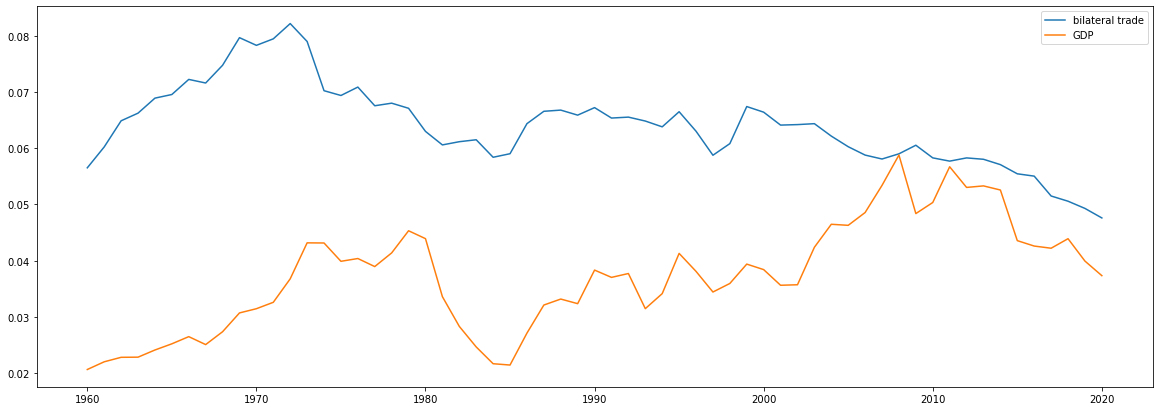

In [60]:
plt.plot(W_France_Germany_function["Trade Intensity by bilateral trade"], label = "bilateral trade")
plt.plot(W_France_Germany_function["Trade Intensity by GDP"], label = "GDP")
plt.legend()

In [61]:
np.corrcoef(W_France_Germany_function["Trade Intensity by bilateral trade"].values[1:].astype("float"), W_France_Germany_function["Trade Intensity by GDP"].values[1:].astype("float"))


array([[ 1.        , -0.29462135],
       [-0.29462135,  1.        ]])